In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#data processing
import pandas as pd
import re
from nltk.corpus import stopwords
stopWords = stopwords.words('english')

#modelling
from gensim.models import Word2Vec
from gensim.models import Phrases
from gensim.models.phrases import Phraser

In [2]:
df1 = pd.read_csv(r'C:\Users\ASUS AZIZ\Downloads\Data Sets\Data Sets\monolingual\Datasets plain\conjuctivitis.csv',delimiter=',',encoding='latin-1')
df1.drop(['category', 'cat2'],axis=1,inplace=True)
df1.head()


,text
0,RT @UnicornDoc: When you have a stye in one ey...
1,When you have a stye in one eye and conjunctiv...
2,@nimmajji Get conjunctivitis from somewhere.. ...
3,RT @master_usmle: Streptococcus pneumoniae: di...
4,Actually so grateful for these eye drops the o...


In [3]:
df2 = pd.read_csv(r'C:\Users\ASUS AZIZ\Downloads\Data Sets\Data Sets\monolingual\Datasets plain\conjuctivitis2.csv',delimiter=',',encoding='latin-1')
df2.drop(['cat2'],axis=1,inplace=True)
df2.head()

,text
0,Leicester eye title boost https://t.co/ldhz61a...
1,New color! Baby pink!
2,handmade Lanyards for ID badges and Eye Glasse...
3,"@marissatunis wake up with the pink eye ????,"
4,Sperry Top Sider Womens Bahama 2 Eye Boat Shoe...


In [4]:
df3 = pd.read_csv(r'C:\Users\ASUS AZIZ\Downloads\Data Sets\Data Sets\monolingual\Datasets plain\gastroenteritis.csv',delimiter=',',encoding='latin-1')
df3.drop(['category', 'cat2'],axis=1,inplace=True)
df3.head()

,text
0,I haven't had the stomach flu since middle sch...
1,When you finally get your appetite back after ...
2,"@_anddreaaa_ yup, with damn stomach flu"
3,Think I caught the stomach flu lol
4,@_MadeeInAsiaa omfg lmaoooo stomach flu!!


In [5]:
df4 = pd.read_csv(r'C:\Users\ASUS AZIZ\Downloads\Data Sets\Data Sets\monolingual\Datasets plain\influenza.csv',delimiter=',',encoding='latin-1')
df4.drop(['cat2'],axis=1,inplace=True)
df4.head()

,text
0,mr. Flu better answer my email or else im goin...
1,Why Marketers Should Pay Attention to Google F...
2,I hate the flu. A lot.
3,Gota get something for this flu ehhhð iza n...
4,I'm pretty sure this man flu


In [6]:
df5 = pd.read_csv(r'C:\Users\ASUS AZIZ\Downloads\Data Sets\Data Sets\monolingual\Datasets plain\norovirus.csv',delimiter=',',encoding='latin-1')
df5.drop(['category','cat2'],axis=1,inplace=True)
df5.head()

,text
0,Norovirus Strikes British Cruise Ship! Hundred...
1,How do breast milk components interact with hu...
2,Hey girl you tust be the norovirus becaus. I c...
3,Hundreds of Brits struck with horror vomit-ind...
4,#HIS2016 @OutbreakJake what is the relationshi...


In [7]:
df = pd.concat([df1,df2,df3,df4,df5])
df.head(5)

,text
0,RT @UnicornDoc: When you have a stye in one ey...
1,When you have a stye in one eye and conjunctiv...
2,@nimmajji Get conjunctivitis from somewhere.. ...
3,RT @master_usmle: Streptococcus pneumoniae: di...
4,Actually so grateful for these eye drops the o...


<h1> Preprocess and prepare the dataset </h1>

In [8]:
def pre_process(text):
    
    #convert to lowercase
    text = str(text).lower()
    
    #remove all special characters and keep only alpha numeric characters and spaces
    text = re.sub(r'[^A-Za-z0-9\s.]',r'',text)
    
    #remove new lines
    text = re.sub(r'\n',r' ',text)
    
    # remove stop words
    text = " ".join([word for word in text.split() if word not in stopWords])
    
    return text

In [9]:
df['text'] = df['text'].map(lambda x: pre_process(x))

In [10]:
df['text'].head()

0            rt unicorndoc stye one eye conjunctivitis
1                          stye one eye conjunctivitis
2    nimmajji get conjunctivitis somewhere.. skodit...
3    rt masterusmle streptococcus pneumoniae diseas...
4    actually grateful eye drops opticians told get...
Name: text, dtype: object

In [11]:
data = df['text'].values.tolist()

In [12]:
corpus = []
for line in data :
    words = [x for x in line.split()]
    corpus.append(words)

In [13]:
corpus[:3]

[['rt', 'unicorndoc', 'stye', 'one', 'eye', 'conjunctivitis'],
 ['stye', 'one', 'eye', 'conjunctivitis'],
 ['nimmajji', 'get', 'conjunctivitis', 'somewhere..', 'skodithala']]

In [14]:
phrases = Phrases(sentences=corpus,min_count=25,threshold=50)
bigram = Phraser(phrases)

In [15]:
for index,sentence in enumerate(corpus):
    corpus[index] = bigram[sentence]

In [16]:
corpus[111]

['nonfiltered',
 'pic',
 'undesired',
 'permanent',
 'wink',
 'conjuntivitis',
 'conjunctivitis',
 'eye',
 'sick',
 'ill',
 'httpst.cocbwyr2pnpf']

<h1> Build the Model </h1>

In [17]:
size = 100
window_size = 2
epochs = 100
min_count = 1
workers = 4
sg = 1

In [18]:
model = Word2Vec(corpus,sg=1,window=window_size,size=size, min_count=min_count,workers=workers,iter=epochs)

In [19]:
model.most_similar('eye')

[('str8', 0.7410385608673096),
 ('detail', 0.7349534034729004),
 ('megancate', 0.7273507118225098),
 ('lookl', 0.7267058491706848),
 ('scar.', 0.7260706424713135),
 ('httpst.cotjgzerby0w', 0.721955418586731),
 ('httpst.covarr3txvsn', 0.7211146354675293),
 ('httpst.cohj2hgo9khc', 0.7199739217758179),
 ('httpst.co6mlllzypaq', 0.7179944515228271),
 ('httpst.co6w8mf1znl5', 0.7149183750152588)]

In [20]:
from sklearn.decomposition import PCA



In [48]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.wv.vocab.keys()), sample)
        else:
            words = [ word for word in model.wv.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(10,10))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

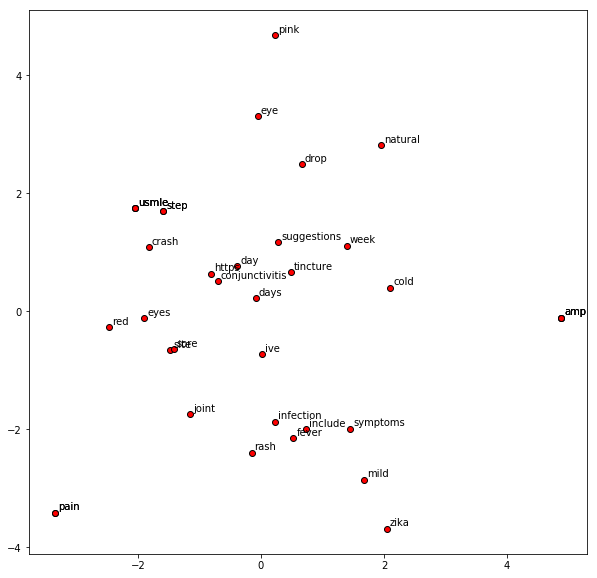

In [49]:
display_pca_scatterplot(model, 
                        [ 'conjunctivitis', 'https', 'step','usmle','fever' ,'rash','joint','site', 'sore' ,'eyes','pain',  'red',
                         'amp','tincture','include','crash', 'usmle', 'step','natural', 'eye' ,'drop','suggestions', 'pink',
                         'mild','pain', 'amp','ive','amp','cold','week','infection','day','usmle','days','symptoms','zika'
                         ])

In [50]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.wv.vocab.keys()), sample)
        else:
            words = [ word for word in model.wv.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(10,10))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

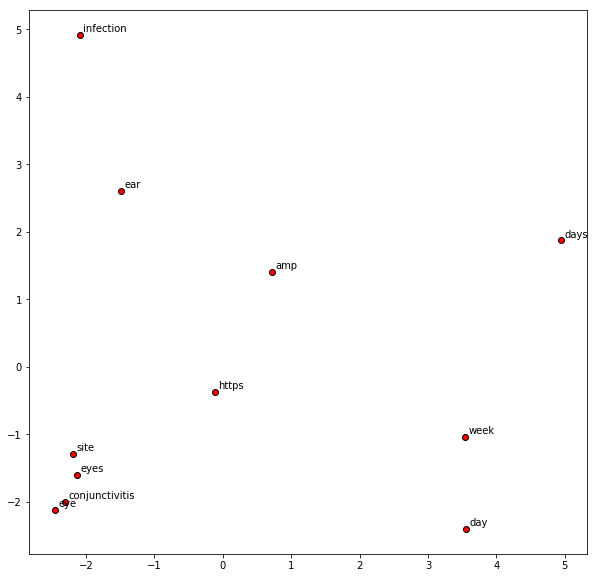

In [51]:
display_pca_scatterplot(model, 
                        [ 'conjunctivitis', 'https','eye','eyes','amp','day','infection','week','site','ear','days'
                         ])

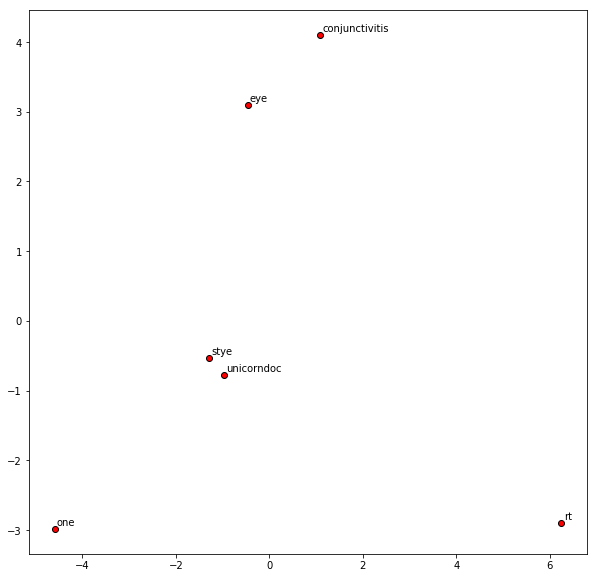

In [34]:
display_pca_scatterplot(model, 
                        [ 'conjunctivitis','eye','one','rt','stye','unicorndoc'
                         ])

In [26]:
keys = ['conjunctivitis','eye','one','rt','stye']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.wv.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [27]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

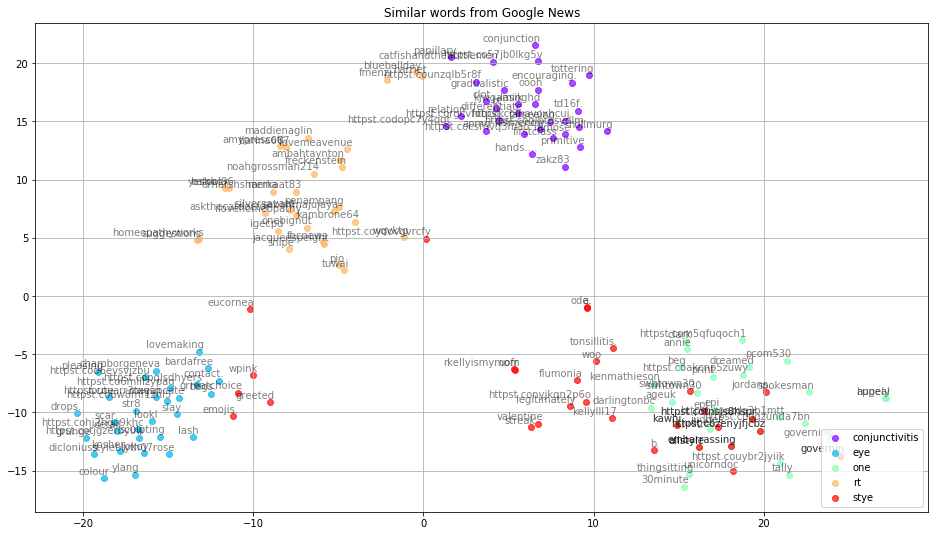

In [28]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=10)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from Google News', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

In [29]:
keys = ['pain','usmle','mild']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.wv.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


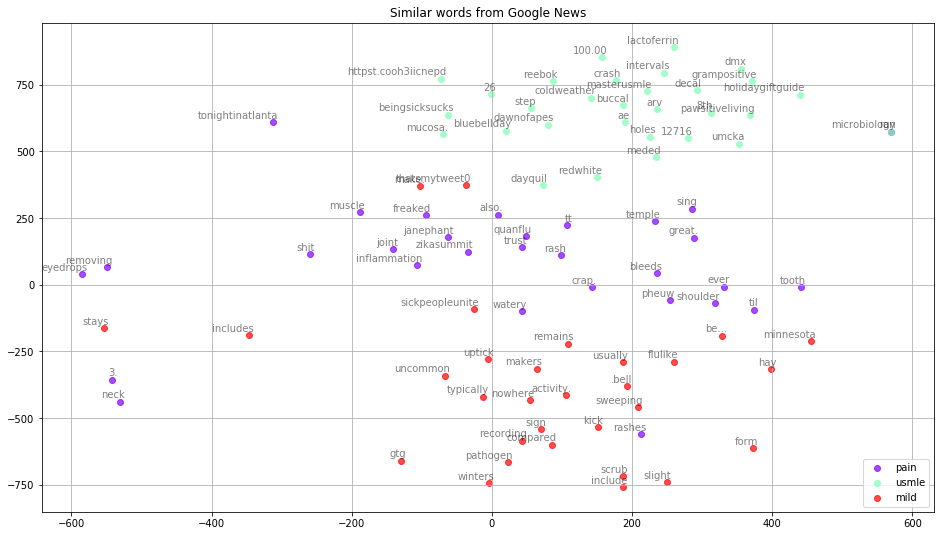

In [86]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=10)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from Google News', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

In [87]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(24, 24)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

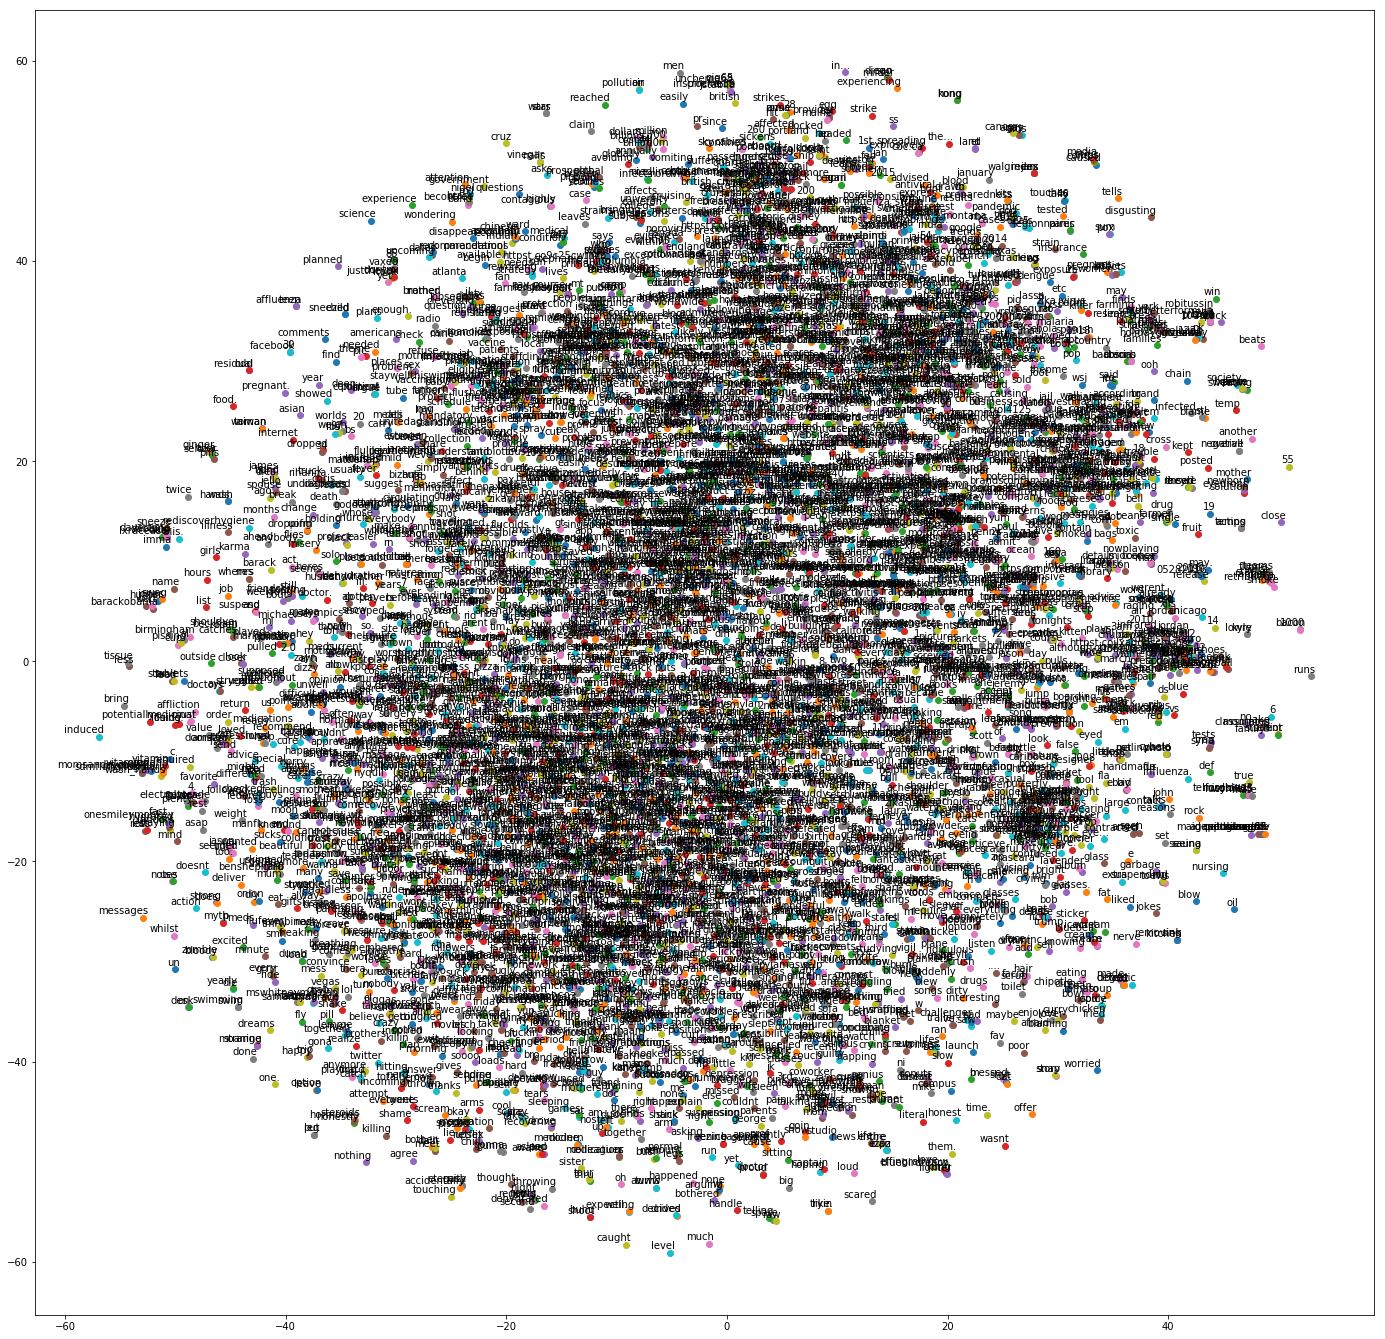

In [82]:
tsne_plot(model)